<a href="https://colab.research.google.com/github/Allen123321/DEMO-DL/blob/master/Regression_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

现在假设有10个x_data和y_data，x和y之间的关系是y_data=b+w*x_data。b，w都是参数，是需要学习出来的。现在我们来练习用梯度下降找到b和w

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl

In [2]:
x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]
x_d = np.asarray(x_data)
y_d = np.asarray(y_data)

In [3]:
x = np.arange(-200, -100, 1)
y = np.arange(-5, 5, 0.1)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)

In [4]:
print(x)
print(X.shape)

[-200 -199 -198 -197 -196 -195 -194 -193 -192 -191 -190 -189 -188 -187
 -186 -185 -184 -183 -182 -181 -180 -179 -178 -177 -176 -175 -174 -173
 -172 -171 -170 -169 -168 -167 -166 -165 -164 -163 -162 -161 -160 -159
 -158 -157 -156 -155 -154 -153 -152 -151 -150 -149 -148 -147 -146 -145
 -144 -143 -142 -141 -140 -139 -138 -137 -136 -135 -134 -133 -132 -131
 -130 -129 -128 -127 -126 -125 -124 -123 -122 -121 -120 -119 -118 -117
 -116 -115 -114 -113 -112 -111 -110 -109 -108 -107 -106 -105 -104 -103
 -102 -101]
(100, 100)


In [5]:
# loss
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0  # meshgrid吐出结果：y为行，x为列
        for n in range(len(x_data)):
            Z[j][i] += (y_data[n] - b - w * x_data[n]) ** 2
        Z[j][i] /= len(x_data)

先给b和w一个初始值，计算出b和w的偏微分

Step 0, w: 0.3810, b: -1.9990, Loss: 413789.3821
Step 10000, w: 2.1366, b: -3.0302, Loss: 19772.9714
Step 20000, w: 2.1396, b: -4.0607, Loss: 19666.7843
Step 30000, w: 2.1425, b: -5.0854, Loss: 19561.7743
Step 40000, w: 2.1455, b: -6.1045, Loss: 19457.9283
Step 50000, w: 2.1484, b: -7.1178, Loss: 19355.2335
Step 60000, w: 2.1513, b: -8.1256, Loss: 19253.6770
Step 70000, w: 2.1542, b: -9.1277, Loss: 19153.2463
Step 80000, w: 2.1570, b: -10.1243, Loss: 19053.9289
Step 90000, w: 2.1599, b: -11.1154, Loss: 18955.7124
Step 100000, w: 2.1627, b: -12.1009, Loss: 18858.5847
Step 110000, w: 2.1655, b: -13.0809, Loss: 18762.5336
Step 120000, w: 2.1683, b: -14.0555, Loss: 18667.5473
Step 130000, w: 2.1711, b: -15.0247, Loss: 18573.6139
Step 140000, w: 2.1739, b: -15.9885, Loss: 18480.7217
Step 150000, w: 2.1766, b: -16.9470, Loss: 18388.8593
Step 160000, w: 2.1794, b: -17.9001, Loss: 18298.0151
Step 170000, w: 2.1821, b: -18.8479, Loss: 18208.1780
Step 180000, w: 2.1848, b: -19.7905, Loss: 18119.

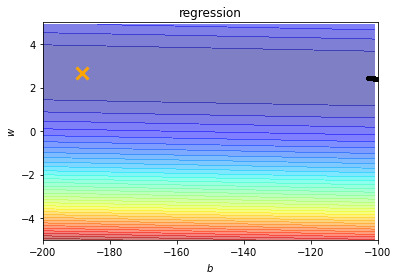

In [6]:
# linear regression
#b = -120
#w = -4
b=-2
w=0.01
lr = 0.000001
iteration = 1400000

b_history = [b]
w_history = [w]
loss_history = []
import time
start = time.time()
for i in range(iteration):
    m = float(len(x_d))
    y_hat = w * x_d  +b
    loss = np.dot(y_d - y_hat, y_d - y_hat) / m
    grad_b = -2.0 * np.sum(y_d - y_hat) / m
    grad_w = -2.0 * np.dot(y_d - y_hat, x_d) / m
    # update param
    b -= lr * grad_b
    w -= lr * grad_w

    b_history.append(b)
    w_history.append(w)
    loss_history.append(loss)
    if i % 10000 == 0:
        print("Step %i, w: %0.4f, b: %.4f, Loss: %.4f" % (i, w, b, loss))
end = time.time()
print("大约需要时间：",end-start)
# plot the figure
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))  # 填充等高线
plt.plot([-188.4], [2.67], 'x', ms=12, mew=3, color="orange")
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$')
plt.ylabel(r'$w$')
plt.title("regression")
plt.show()

横坐标是b，纵坐标是w，标记×位最优解。发现离最优解还很远,那么我们就调大learning rate，

Step 0, w: 1.8648, b: -1.9952, Loss: 413789.3821
Step 10000, w: 2.1484, b: -7.1183, Loss: 19355.2329
Step 20000, w: 2.1627, b: -12.1013, Loss: 18858.5836
Step 30000, w: 2.1766, b: -16.9474, Loss: 18388.8578
Step 40000, w: 2.1902, b: -21.6603, Loss: 17944.5958
Step 50000, w: 2.2034, b: -26.2436, Loss: 17524.4173
Step 60000, w: 2.2162, b: -30.7010, Loss: 17127.0167
Step 70000, w: 2.2286, b: -35.0359, Loss: 16751.1593
Step 80000, w: 2.2407, b: -39.2517, Loss: 16395.6772
Step 90000, w: 2.2525, b: -43.3516, Loss: 16059.4658
Step 100000, w: 2.2640, b: -47.3389, Loss: 15741.4804
Step 110000, w: 2.2751, b: -51.2165, Loss: 15440.7331
Step 120000, w: 2.2860, b: -54.9876, Loss: 15156.2893
Step 130000, w: 2.2965, b: -58.6551, Loss: 14887.2653
Step 140000, w: 2.3067, b: -62.2217, Loss: 14632.8251
Step 150000, w: 2.3167, b: -65.6903, Loss: 14392.1781
Step 160000, w: 2.3264, b: -69.0637, Loss: 14164.5766
Step 170000, w: 2.3358, b: -72.3442, Loss: 13949.3134
Step 180000, w: 2.3450, b: -75.5347, Loss: 

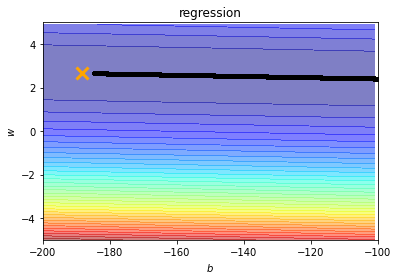

In [7]:
# linear regression
#b = -120
#w = -4
b=-2
w=0.01
lr = 0.000005
iteration = 1400000

b_history = [b]
w_history = [w]
loss_history = []
import time
start = time.time()
for i in range(iteration):
    m = float(len(x_d))
    y_hat = w * x_d  +b
    loss = np.dot(y_d - y_hat, y_d - y_hat) / m
    grad_b = -2.0 * np.sum(y_d - y_hat) / m
    grad_w = -2.0 * np.dot(y_d - y_hat, x_d) / m
    # update param
    b -= lr * grad_b
    w -= lr * grad_w

    b_history.append(b)
    w_history.append(w)
    loss_history.append(loss)
    if i % 10000 == 0:
        print("Step %i, w: %0.4f, b: %.4f, Loss: %.4f" % (i, w, b, loss))
end = time.time()
print("大约需要时间：",end-start)
# plot the figure
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))  # 填充等高线
plt.plot([-188.4], [2.67], 'x', ms=12, mew=3, color="orange")
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$')
plt.ylabel(r'$w$')
plt.title("regression")
plt.show()

这时候结果不错，如果继续加大lr 

Step 0, w: 3.7197, b: -1.9904, Loss: 413789.3821
Step 10000, w: 2.1627, b: -12.1018, Loss: 18858.5823
Step 20000, w: 2.1902, b: -21.6608, Loss: 17944.5934
Step 30000, w: 2.2162, b: -30.7015, Loss: 17127.0135
Step 40000, w: 2.2407, b: -39.2522, Loss: 16395.6733
Step 50000, w: 2.2640, b: -47.3393, Loss: 15741.4761
Step 60000, w: 2.2860, b: -54.9880, Loss: 15156.2847
Step 70000, w: 2.3067, b: -62.2221, Loss: 14632.8202
Step 80000, w: 2.3264, b: -69.0641, Loss: 14164.5717
Step 90000, w: 2.3450, b: -75.5351, Loss: 13745.7147
Step 100000, w: 2.3626, b: -81.6553, Loss: 13371.0395
Step 110000, w: 2.3792, b: -87.4438, Loss: 13035.8857
Step 120000, w: 2.3950, b: -92.9184, Loss: 12736.0844
Step 130000, w: 2.4098, b: -98.0963, Loss: 12467.9066
Step 140000, w: 2.4239, b: -102.9935, Loss: 12228.0167
Step 150000, w: 2.4372, b: -107.6252, Loss: 12013.4308
Step 160000, w: 2.4498, b: -112.0058, Loss: 11821.4797
Step 170000, w: 2.4617, b: -116.1489, Loss: 11649.7760
Step 180000, w: 2.4730, b: -120.0675, 

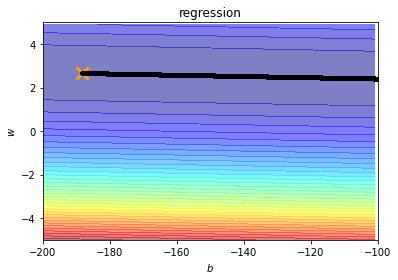

In [8]:
# linear regression
#b = -120
#w = -4
b=-2
w=0.01
lr = 0.00001
iteration = 1400000

b_history = [b]
w_history = [w]
loss_history = []
import time
start = time.time()
for i in range(iteration):
    m = float(len(x_d))
    y_hat = w * x_d  +b
    loss = np.dot(y_d - y_hat, y_d - y_hat) / m
    grad_b = -2.0 * np.sum(y_d - y_hat) / m
    grad_w = -2.0 * np.dot(y_d - y_hat, x_d) / m
    # update param
    b -= lr * grad_b
    w -= lr * grad_w

    b_history.append(b)
    w_history.append(w)
    loss_history.append(loss)
    if i % 10000 == 0:
        print("Step %i, w: %0.4f, b: %.4f, Loss: %.4f" % (i, w, b, loss))
end = time.time()
print("大约需要时间：",end-start)
# plot the figure
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))  # 填充等高线
plt.plot([-188.4], [2.67], 'x', ms=12, mew=3, color="orange")
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$')
plt.ylabel(r'$w$')
plt.title("regression")
plt.show()

给b和w特制化两种learning rate

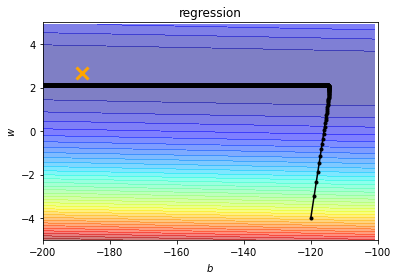

In [9]:
# linear regression
b = -120
w = -4
lr = 1
iteration = 100000

b_history = [b]
w_history = [w]

lr_b=0
lr_w=0
import time
start = time.time()
for i in range(iteration):
    b_grad=0.0
    w_grad=0.0
    for n in range(len(x_data)):
        b_grad=b_grad-2.0*(y_data[n]-n-w*x_data[n])*1.0
        w_grad= w_grad-2.0*(y_data[n]-n-w*x_data[n])*x_data[n]
    
    lr_b=lr_b+b_grad**2
    lr_w=lr_w+w_grad**2
    # update param
    b -= lr/np.sqrt(lr_b) * b_grad
    w -= lr /np.sqrt(lr_w) * w_grad

    b_history.append(b)
    w_history.append(w)

# plot the figure
plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))  # 填充等高线
plt.plot([-188.4], [2.67], 'x', ms=12, mew=3, color="orange")
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$')
plt.ylabel(r'$w$')
plt.title("regression")
plt.show()